**MUHAMMAD INSAN KAMIL-DICODING BELAJAR MACHINE LEARNING PEMULA-PROJECT AKHIR KLASIFIKASI GAMBAR**

Connecting drive to colab


In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CNN

Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import f1_score

Data Directory

In [ ]:
dir='/content/drive/MyDrive/Colab Notebooks/Data/rockpaperscissors'

IMG Shape

In [ ]:
img_height, img_width, channel = [224,224,3]

Data Loading & Preprocessing

In [ ]:
preprocess_hand = tf.keras.applications.vgg19.preprocess_input

train_datagen= ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.3145,
    preprocessing_function=preprocess_hand
)
val_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.4571,preprocessing_function=preprocess_hand)

In [ ]:
train_dataset = train_datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',
    subset='training'
)
val_dataset = val_datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    class_mode='sparse',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Creating CNN Model

In [ ]:
#build model
models = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


Plot Model CNN

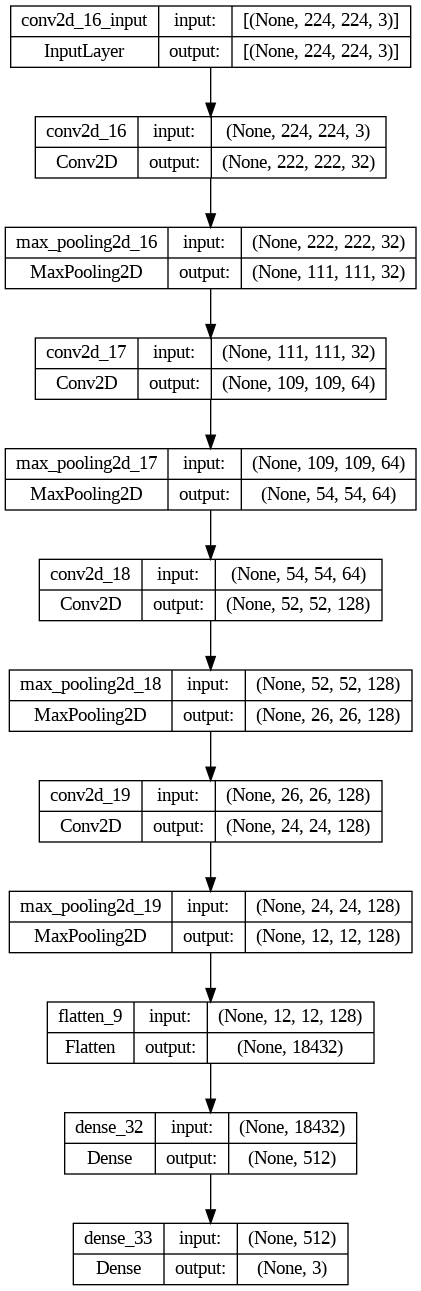

In [ ]:
plot_model(models, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

Callbacks

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,verbose= 1,restore_best_weights=True)
mcp = tf.keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True,monitor='val_loss')
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.1, min_lr = 1e-10)

Fitting Model

In [ ]:
models.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history= models.fit(
      train_dataset,
      steps_per_epoch=25,
      epochs=30,
      verbose=2,
      validation_data=val_dataset,
      validation_steps=5,
      )

Epoch 1/30
25/25 - 18s - loss: 1.0311 - accuracy: 0.4800 - val_loss: 0.7985 - val_accuracy: 0.6500 - 18s/epoch - 712ms/step
Epoch 2/30
25/25 - 15s - loss: 0.6908 - accuracy: 0.7163 - val_loss: 0.3520 - val_accuracy: 0.9062 - 15s/epoch - 596ms/step
Epoch 3/30
25/25 - 16s - loss: 0.3829 - accuracy: 0.8637 - val_loss: 0.2007 - val_accuracy: 0.9312 - 16s/epoch - 641ms/step
Epoch 4/30
25/25 - 14s - loss: 0.3441 - accuracy: 0.8935 - val_loss: 0.1116 - val_accuracy: 0.9625 - 14s/epoch - 577ms/step
Epoch 5/30
25/25 - 16s - loss: 0.2107 - accuracy: 0.9312 - val_loss: 0.1047 - val_accuracy: 0.9750 - 16s/epoch - 626ms/step
Epoch 6/30
25/25 - 15s - loss: 0.1975 - accuracy: 0.9400 - val_loss: 0.1365 - val_accuracy: 0.9563 - 15s/epoch - 612ms/step
Epoch 7/30
25/25 - 16s - loss: 0.1916 - accuracy: 0.9425 - val_loss: 0.0595 - val_accuracy: 0.9875 - 16s/epoch - 637ms/step
Epoch 8/30
25/25 - 15s - loss: 0.1469 - accuracy: 0.9513 - val_loss: 0.1225 - val_accuracy: 0.9625 - 15s/epoch - 595ms/step
Epoch 9/

Evaluate

In [ ]:
loss, accur = models.evaluate(train_dataset)
preds = models.predict(train_dataset)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(train_dataset.labels)

42/42 [==============================] - 20s 486ms/step


In [ ]:
f1s = f1_score(y_test,y_preds,average='micro')
print(f'''Loss Data Training: {history.history['loss'][-1]}
Akurasi Data Validasi: {history.history['val_accuracy'][-1]}
Akurasi Data Testing: {accur}
F1Score Data Testing: {f1s}''')

Loss Data Training: 0.09016503393650055
Akurasi Data Validasi: 0.9937499761581421
Akurasi Data Testing: 0.9718416929244995
F1Score Data Testing: 0.3493150684931507


Saving h89sRVkct1nAdPfo.png to h89sRVkct1nAdPfo.png
1/1 [==============================] - 0s 75ms/step
[[[[ 41. 121.  47.]
   [ 42. 119.  45.]
   [ 36. 119.  41.]
   ...
   [153. 109.  70.]
   [154. 110.  71.]
   [154. 107.  69.]]

  [[ 38. 123.  45.]
   [ 38. 121.  43.]
   [ 34. 122.  42.]
   ...
   [156. 110.  71.]
   [156. 110.  69.]
   [155. 109.  68.]]

  [[ 37. 122.  43.]
   [ 40. 122.  45.]
   [ 35. 123.  43.]
   ...
   [155. 108.  70.]
   [155. 109.  68.]
   [158. 112.  71.]]

  ...

  [[ 33. 126.  43.]
   [ 32. 125.  41.]
   [ 33. 126.  43.]
   ...
   [ 39. 124.  46.]
   [ 38. 125.  46.]
   [ 42. 125.  45.]]

  [[ 33. 126.  43.]
   [ 33. 126.  43.]
   [ 32. 125.  41.]
   ...
   [ 40. 126.  47.]
   [ 39. 126.  47.]
   [ 41. 124.  44.]]

  [[ 32. 125.  41.]
   [ 31. 124.  40.]
   [ 32. 125.  41.]
   ...
   [ 40. 126.  47.]
   [ 39. 126.  47.]
   [ 40. 122.  45.]]]]
Batu


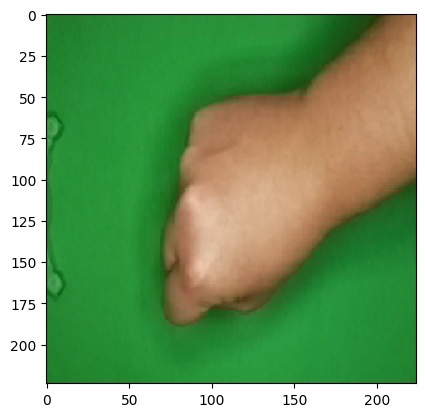

In [ ]:
%matplotlib inline

uploaded = files.upload()

for x in uploaded.keys():

  # predicting images
  path = x
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = models.predict(images, batch_size=10)

  print(x)
  if (classes[0][0] == 1) :
    print("Kertas")
  elif (classes[0][1] == 1) :
    print("Batu")
  elif (classes[0][2] == 1) :
    print("Gunting")
